In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt #Simplified Interface of Matplotlib
import json
from platform import python_version
from datetime import datetime
from datetime import timedelta
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
import dataframe_image as dfi
from IPython.core.display import display,HTML

print(python_version())

3.9.13


In [2]:
df = pd.read_json('paindocdata.json')
df.dtypes #Returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns.

type        object
version     object
comment     object
name        object
database    object
data        object
dtype: object

In [3]:
df

,type,version,comment,name,database,data
0,header,5.2.0,Export to JSON plugin for PHPMyAdmin,NaN,NaN,NaN
1,database,NaN,NaN,firstdb,NaN,NaN
2,table,NaN,NaN,paindocdata,firstdb,"[{'OB': '1', 'name': 'Helena Müller', 'side': ..."


In [4]:
#dir(df)

In [5]:
df.data

0                                                  NaN
1                                                  NaN
2    [{'OB': '1', 'name': 'Helena Müller', 'side': ...
Name: data, dtype: object

In [6]:
df2=df.data[2] #obtenemos los datos de interes
df2

[{'OB': '1',
  'name': 'Helena Müller',
  'side': 'R',
  'bodySite': 'Neck',
  'painful': '5',
  'period': '2 weeks',
  'dayTime': 'The whole day',
  'intervall': 'Constant pain with slight fluctuations',
  'kind': 'Oppressive',
  'impairment': 'gardening, laundry, swimming',
  'painkillers': 'no'},
 {'OB': '2',
  'name': 'Helena Müller',
  'side': 'L',
  'bodySite': 'Middle finger 1',
  'painful': '8',
  'period': '5 days',
  'dayTime': 'Morning',
  'intervall': 'Pain attacks, also between',
  'kind': 'Pungent',
  'impairment': 'working, car driving, eating',
  'painkillers': 'yes'},
 {'OB': '5',
  'name': 'Margit Meier',
  'side': 'L',
  'bodySite': 'Knee',
  'painful': '8',
  'period': '3 days',
  'dayTime': 'Morning, Night',
  'intervall': 'Constant pain with slight fluctuations',
  'kind': 'Dull, Pungent',
  'impairment': 'sleeping, cooking, walking',
  'painkillers': 'yes'},
 {'OB': '6',
  'name': 'Margit Meier',
  'side': 'R',
  'bodySite': 'Big 1',
  'painful': '5',
  'period':

In [7]:
dfn = pd.json_normalize(df2)
dfn
#df3 = json.dumps(df2, sort_keys=True, ensure_ascii=False) #reordenamos los datos y aseguramos que los acentos esten bien
#df3

,OB,name,side,bodySite,painful,period,dayTime,intervall,kind,impairment,painkillers
0,1,Helena Müller,R,Neck,5,2 weeks,The whole day,Constant pain with slight fluctuations,Oppressive,"gardening, laundry, swimming",no
1,2,Helena Müller,L,Middle finger 1,8,5 days,Morning,"Pain attacks, also between",Pungent,"working, car driving, eating",yes
2,5,Margit Meier,L,Knee,8,3 days,"Morning, Night",Constant pain with slight fluctuations,"Dull, Pungent","sleeping, cooking, walking",yes
3,6,Margit Meier,R,Big 1,5,2 months,"Launch, Afternoon",Constant pain with strong fluctuations,"Throbbing, Hot","eating, cooking, laundry",no
4,7,Margit Meier,B,Hip,10,1 month,The whole day,Constant pain with slight fluctuations,"Burning, Hot, Pungent","walking, sleeping",yes
5,8,Margit Meier,R,Shoulder,3,2 weeks,Night,"Pain attacks, Painless in between",Knocking,,no
6,9,Sandra Huber,B,Hand,7,1 week,The whole day,Constant pain with strong fluctuations,Hot,"working, cycling, cooking, eating, gardening",yes
7,10,Sandra Huber,L,Hip,4,3 weeks,Afternoon,"Pain attacks, also between",Pungent,seating,no
8,11,Sandra Huber,B,elbow,5,1 week,The whole day,Constant pain with strong fluctuations,Hot,"working, cycling, cooking, eating, gardening",yes
9,12,Emily Bartels,R,Ankle,6,1 week,Evening,Constant pain with slight fluctuations,Throbbing,"long standing, running, shopping",no


In [8]:
dir(dfn)

['OB',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__rep

In [9]:
dfn.dtypes

OB             object
name           object
side           object
bodySite       object
painful        object
period         object
dayTime        object
intervall      object
kind           object
impairment     object
painkillers    object
dtype: object

In [10]:
dff = (dfn
  .astype({
     'OB':  'int8',
     'name': 'category',
      'side': 'category',
     'bodySite': 'category',
     'painful': 'int8',
      'period': 'category',
      'dayTime': 'category',
     'intervall': 'category',
      'kind': 'category',
      'impairment': 'category',
      'painkillers': 'category',
  })
)
dff

,OB,name,side,bodySite,painful,period,dayTime,intervall,kind,impairment,painkillers
0,1,Helena Müller,R,Neck,5,2 weeks,The whole day,Constant pain with slight fluctuations,Oppressive,"gardening, laundry, swimming",no
1,2,Helena Müller,L,Middle finger 1,8,5 days,Morning,"Pain attacks, also between",Pungent,"working, car driving, eating",yes
2,5,Margit Meier,L,Knee,8,3 days,"Morning, Night",Constant pain with slight fluctuations,"Dull, Pungent","sleeping, cooking, walking",yes
3,6,Margit Meier,R,Big 1,5,2 months,"Launch, Afternoon",Constant pain with strong fluctuations,"Throbbing, Hot","eating, cooking, laundry",no
4,7,Margit Meier,B,Hip,10,1 month,The whole day,Constant pain with slight fluctuations,"Burning, Hot, Pungent","walking, sleeping",yes
5,8,Margit Meier,R,Shoulder,3,2 weeks,Night,"Pain attacks, Painless in between",Knocking,,no
6,9,Sandra Huber,B,Hand,7,1 week,The whole day,Constant pain with strong fluctuations,Hot,"working, cycling, cooking, eating, gardening",yes
7,10,Sandra Huber,L,Hip,4,3 weeks,Afternoon,"Pain attacks, also between",Pungent,seating,no
8,11,Sandra Huber,B,elbow,5,1 week,The whole day,Constant pain with strong fluctuations,Hot,"working, cycling, cooking, eating, gardening",yes
9,12,Emily Bartels,R,Ankle,6,1 week,Evening,Constant pain with slight fluctuations,Throbbing,"long standing, running, shopping",no


In [11]:
pivot_table = dff.pivot_table(index="name", columns=["bodySite"], values=['painful'], aggfunc='sum', fill_value=" ")
pivot_table

painful                                              \
bodySite               Ankle Big 1 Elbow Feet Hand Head Hip Index 3 Knee   
name                                                                       
Chiara Moreno              0     0     0    0    0    0   0       0    0   
Emily Bartels              6     0     0    0    2    0   0       0    0   
Hannelore Furthmeier       0     0     0    0    0    0   5       0    0   
Helena Müller              0     0     0    0    0    0   0       0    0   
Irmgard Müller             0     0     0    0    0    0   2       0    8   
Ivet Graus                 4     0     6    0    0    0   0       0    0   
James Jasso               10     0     9    0    5    0   0       0    2   
Jana Haundorfer            0     0     0    0    0    0   7       0    0   
Jonas Mühldorfer           0     0     0    2    0    0   0       3    0   
Julia Oberndorfer          0    10     0    0    2    0   6       0    0   
Lena Rieder                0     0     1    0    0    0   4       0    0   
Luitpold Berger            4     0     0    3    0    7   0       0    0   
Margit Meier               0     5     0    0    0    0  10       0    8   
Marianne Weber             0     0     0    0    0    0   0       0    8   
Marie Schmidt              0     0     0    5    0    8   0       0    0   
Miriam Klose               0     0     0    0    0    2   0       0    0   
Sandra Huber               0     0     0    0    7    0   4       0    0   
Simon Wüst                 0     0     0    0    4    0   0       0    9   
Thomas Ruf                 0     0     0    0    0    3   0       0    2   
Xaver Kreitmeier           0     0     0    0    0    8   0       0    0   

                                                                          \
bodySite             Middle finger 1 Neck Pointer 2 Ring 2 Ring finger 3   
name                                                                       
Chiara Moreno                      0    5         0      0             0   
Emily Bartels                      0    0         0      0             0   
Hannelore Furthmeier               0    5         0      0             0   
Helena Müller                      8    5         0      0             0   
Irmgard Müller                     0    0         0      0             0   
Ivet Graus                         0    0         0      0             0   
James Jasso                        0    0         0      0             0   
Jana Haundorfer                    0    0         0      4             0   
Jonas Mühldorfer                   0    0         0      0             0   
Julia Oberndorfer                  0    0         0      0             0   
Lena Rieder                        0    0         0      0             0   
Luitpold Berger                    0    0         4      0             0   
Margit Meier                       0    0         0      0             0   
Marianne Weber                     0    1         0      0             0   
Marie Schmidt                      0    0         0      0             0   
Miriam Klose                       0    0         0      0             8   
Sandra Huber                       0    0         0      0             0   
Simon Wüst                         0    0         0      0             0   
Thomas Ruf                         0    0         0      0             0   
Xaver Kreitmeier                   0    0         0      0             0   

                                                     
bodySite             RingT 2 Shoulder Thumb 1 elbow  
name                                                 
Chiara Moreno              0        0       0     0  
Emily Bartels              0        0       0     0  
Hannelore Furthmeier       0        5       0     0  
Helena Müller              0        0       0     0  
Irmgard Müller             0        5       0     0  
Ivet Graus                 0        0       8     0  
James Jasso                0        0

Text(299.25000000000006, 0.5, 'Patient')

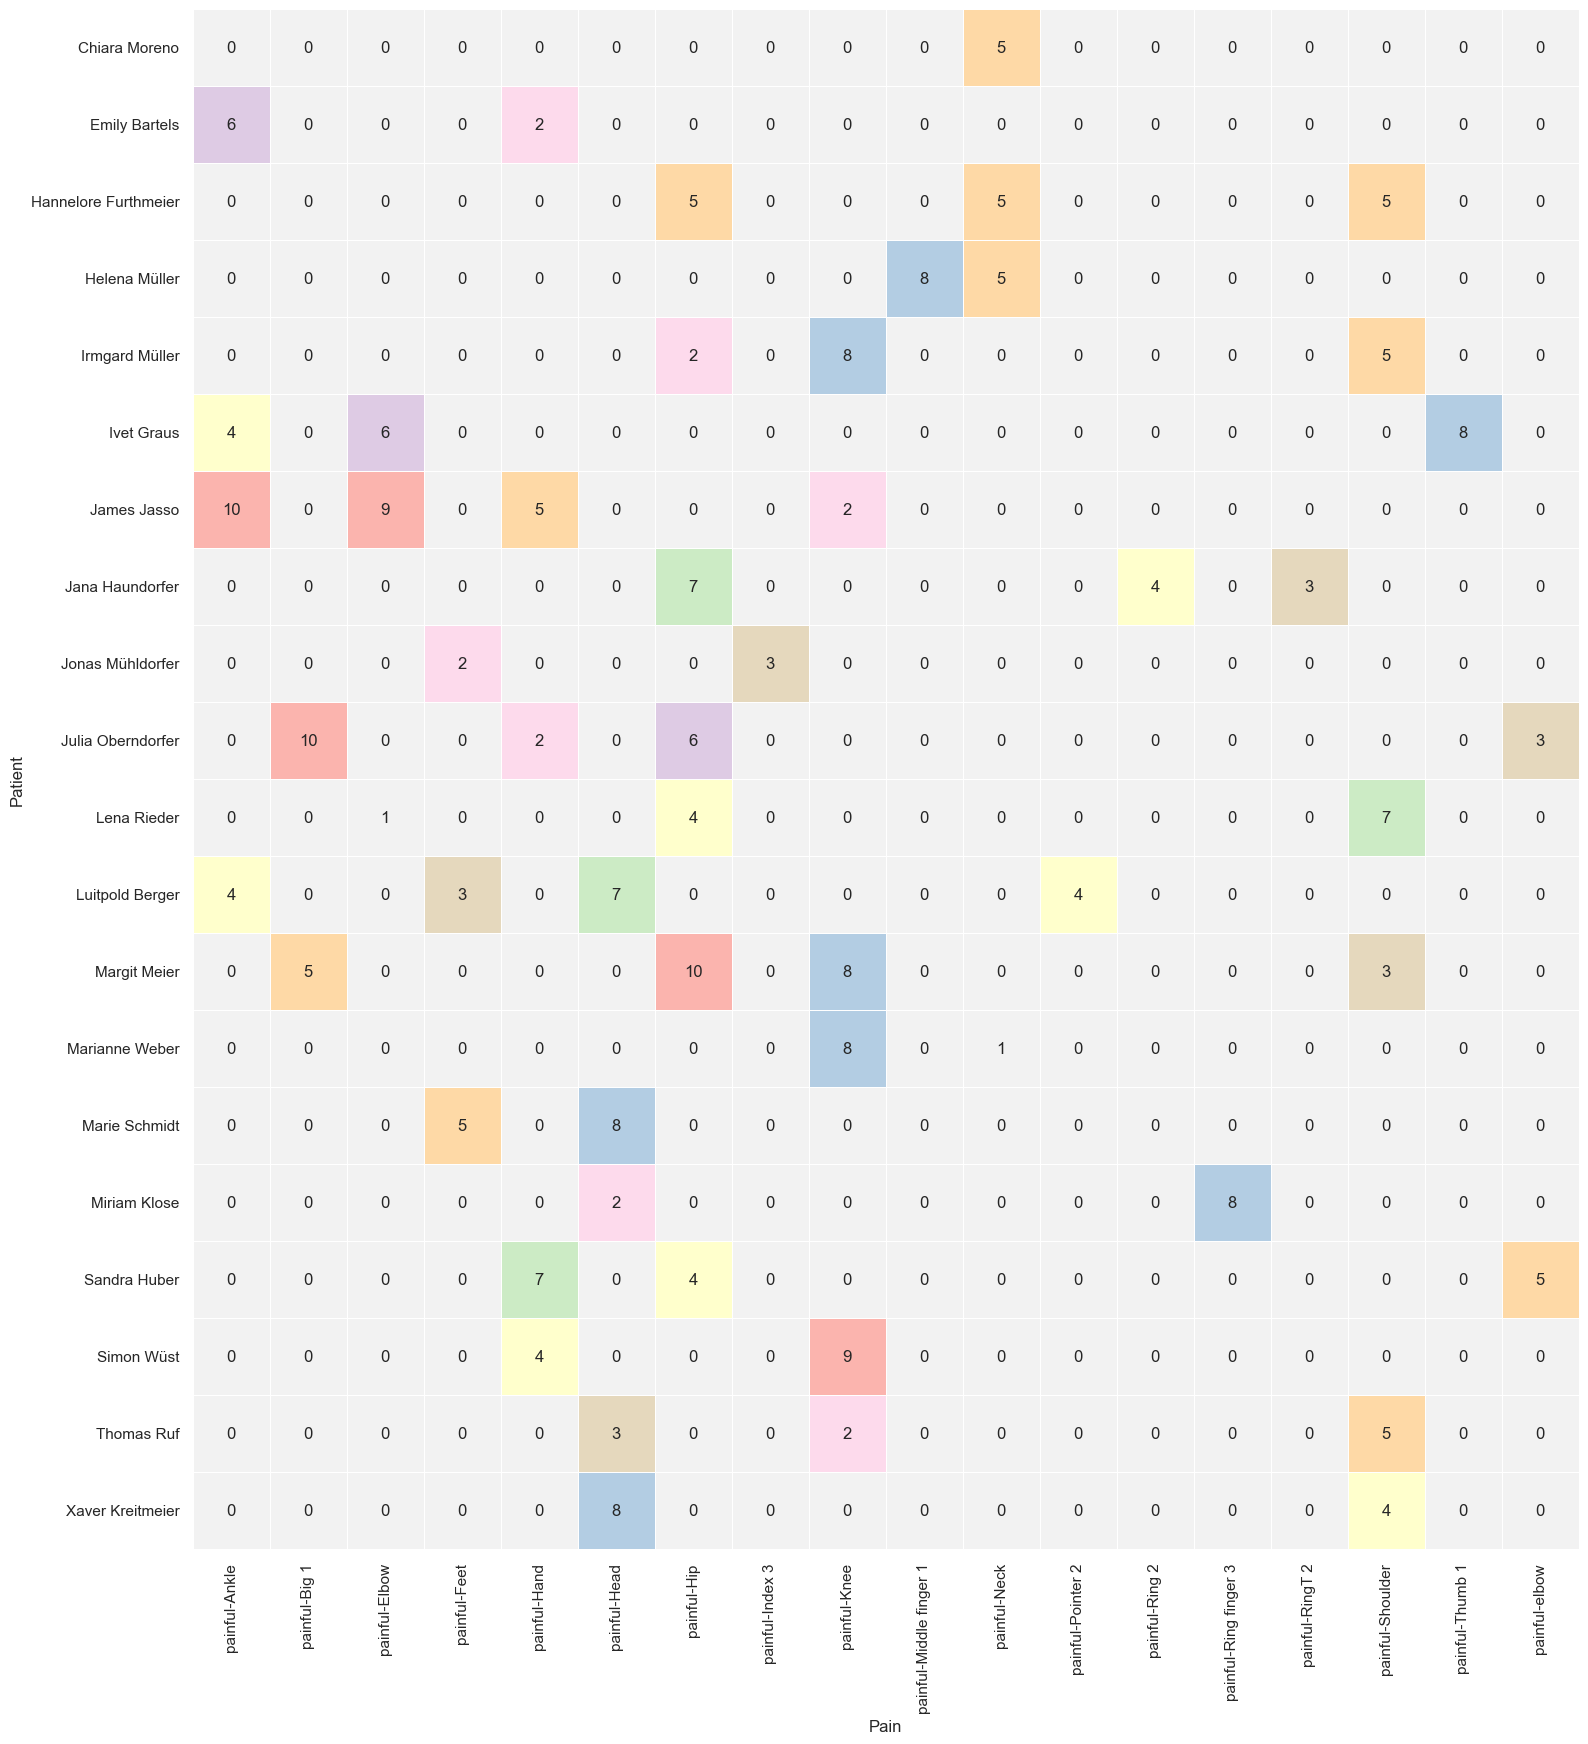

In [12]:
sns.set(rc={'figure.figsize':(20,20)}) #Tamaño general del heatmap
plt.cla()
rel = pivot_table.copy(deep=True) #Copiamos la tabla anterior 
heatmap_plot = sns.heatmap(rel, vmin=0, vmax=10, cmap = 'Pastel1_r', linecolor = 'white', linewidths = .5, cbar = False, square = True, annot=True) #Creamos el heatmap
#Rel son los datos que toma, Valorminimio, Colores la r es para inertirlo, linecolor es la linea entre cuadros y su grosor, square es forma, annot es númerodentro
heatmap_plot.set_xlabel('Pain')
heatmap_plot.set_ylabel('Patient')
#heatmap_plot.xaxis.tick_top()

In [13]:
#creación de mi paleta de colores
cm = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['green','yellow', 'orange','red']
)
#cm = sns.diverging_palette(138,15, as_cmap=True) #para agregar una paleta de dos colores

In [14]:
tab1 = dfn[dfn['name'] == 'James Jasso'] #Obtener los que de este nombre
tab1
#dff.drop(dff.index[2:50], inplace=True) #ambos eliminan filas
#dff
#rel3 = dff.iloc[:2]
#rel3

,OB,name,side,bodySite,painful,period,dayTime,intervall,kind,impairment,painkillers
47,50,James Jasso,B,Knee,2,1 day,Morning,Constant pain with strong fluctuations,Throbbing,,no
48,51,James Jasso,B,Ankle,10,1 week,The whole day,"Pain attacks, also in between",Oppressive,"walking, long standing, cooking, shopping",yes
49,52,James Jasso,L,Elbow,9,4 days,Morning,Constant pain with slight fluctuations,Burning,"cooking, laundry",yes
50,53,James Jasso,L,Hand,5,2 weeks,Night,Constant pain with slight fluctuations,Oppressive,sleeping,yes


In [15]:
tab1.pop('OB') #Return item and drop from frame, quitamos OB

47    50
48    51
49    52
50    53
Name: OB, dtype: object

In [16]:
tab1.pop('name')

47    James Jasso
48    James Jasso
49    James Jasso
50    James Jasso
Name: name, dtype: object

In [19]:
rel4[['num','word']]= tab1.period.str.split(pat=' ',expand=True)
rel4 #Recorrer, ajustar numero

,0,1,num,word
47,1,day,1,day
48,1,week,1,week
49,4,days,4,days
50,2,weeks,2,weeks


In [20]:
rel4.loc[rel4['word'] == 'month', 'word'] = '30'
rel4.loc[rel4['word'] == 'months', 'word'] = '30'
rel4.loc[rel4['word'] == 'day', 'word'] = '1'
rel4.loc[rel4['word'] == 'days', 'word'] = '1'
rel4.loc[rel4['word'] == 'week', 'word'] = '7'
rel4.loc[rel4['word'] == 'weeks', 'word'] = '7'

In [21]:
rel4

,0,1,num,word
47,1,day,1,1
48,1,week,1,7
49,4,days,4,1
50,2,weeks,2,7


In [22]:
rel4.dtypes

0       object
1       object
num     object
word    object
dtype: object

In [23]:
rel4 = (rel4
  .astype({
     'num':  'int8',
     'word': 'int8',
  })
)
rel4

,0,1,num,word
47,1,day,1,1
48,1,week,1,7
49,4,days,4,1
50,2,weeks,2,7


In [24]:
rel4['Period'] = rel4['num'] * rel4['word']
rel4

,0,1,num,word,Period
47,1,day,1,1,1
48,1,week,1,7,7
49,4,days,4,1,4
50,2,weeks,2,7,14


In [25]:
rel4.Period

47     1
48     7
49     4
50    14
Name: Period, dtype: int8

In [41]:
s2=tab1.style.background_gradient(gmap=rel4['Period'], cmap=cm, axis=0, subset=['period']).background_gradient(gmap=tab1['painful'], vmin=1, vmax=10, cmap=cm, axis=0, subset=['bodySite'])
s2

,side,bodySite,painful,period,dayTime,intervall,kind,impairment,painkillers
47,B,Knee,2,1 day,Morning,Constant pain with strong fluctuations,Throbbing,,no
48,B,Ankle,10,1 week,The whole day,"Pain attacks, also in between",Oppressive,"walking, long standing, cooking, shopping",yes
49,L,Elbow,9,4 days,Morning,Constant pain with slight fluctuations,Burning,"cooking, laundry",yes
50,L,Hand,5,2 weeks,Night,Constant pain with slight fluctuations,Oppressive,sleeping,yes


In [40]:
s1=rel4.style.bar(subset=['Period'], color='#66E19A')
s1

,0,1,num,word,Period
47,1,day,1,1,1
48,1,week,1,7,7
49,4,days,4,1,4
50,2,weeks,2,7,14


In [35]:
s2.hide_columns('painful')

C:\Users\jimen\AppData\Local\Temp\ipykernel_28376\2239080434.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='columns')`
  s2.hide_columns('painful')


side,bodySite,period,dayTime,intervall,kind,impairment,painkillers
B,Knee,1 day,Morning,Constant pain with strong fluctuations,Throbbing,,no
B,Ankle,1 week,The whole day,"Pain attacks, also in between",Oppressive,"walking, long standing, cooking, shopping",yes
L,Elbow,4 days,Morning,Constant pain with slight fluctuations,Burning,"cooking, laundry",yes
L,Hand,2 weeks,Night,Constant pain with slight fluctuations,Oppressive,sleeping,yes


In [261]:
import plotly.figure_factory as ff
from pandas.plotting import table 

In [70]:
rel3 = pivot_table.index#Los índices de la tabla general son los nombres, así no se repiten
ind=0
for i in rel3:
    ind=ind+1
    rel4 = [i]
    print(rel4)

['Chiara Moreno']
['Emily Bartels']
['Hannelore Furthmeier']
['Helena Müller']
['Irmgard Müller']
['Ivet Graus']
['James Jasso']
['Jana Haundorfer']
['Jonas Mühldorfer']
['Julia Oberndorfer']
['Lena Rieder']
['Luitpold Berger']
['Margit Meier']
['Marianne Weber']
['Marie Schmidt']
['Miriam Klose']
['Sandra Huber']
['Simon Wüst']
['Thomas Ruf']
['Xaver Kreitmeier']


In [71]:
ind

20